# Homework 3: Problem 9

# Introduction
In this problem, the goal is to produce plots of a biker's velocity over time. While the differential equation is somewhat unphysical due to the blowup in acceleration if velocity is zero, the point is to get experience implementing the euler method. The differential equation is reasonable enough to both solve analytically and to produce pretty reasonable behavior for a biker when simulated. Solving the differential equation when there is no drag is straightforward, and implementing the euler method was not too bad.


Consider a professional cyclist on a flat surface with air resistance. Instead of the acceleration of gravity, the relevant equation of motion is
$$ \frac{dv}{dt} = \frac{P}{mv} $$
where $P$ is the (constant) power exerted by the rider and $m$ is their mass.

## Part a)
Solve the equation of motion analytically for v(t) with no air resistance.

We begin be rearranging the given equation to
$$ v\,dv = \frac{P\,dt}{m} $$
by multiplying both sides by $v\,dt$.

We can then integrate both sides with general bounds $v_0$,$t$, and $v(t)$ as follows:
$$\int_{v_0}^{v(t)} v'\,dv' = \int_{0}^{t} \frac{P}{m} \,dt'$$
where we rename our integration variables to $v'$ and $t'$ to avoid ambiguity with the bounds $v(t)$ and $t$.
The integrals are then
$$ v'^2\Big|_{v_{0}}^{v(t)} = t'\frac{P}{m}\Big|_{0}^{t}$$
which simplify to
$$ {v(t)}^2 - v_{0}^2 = \frac{P}{m}\,t$$ and can be rearranged to
$$ {v(t)}^2 = \frac{P}{m}\,t+v_{0}^2$$
To finally solve for $v(t)$, we take the square root of both sides and choose the positive root
$$ v(t) = \sqrt{\frac{P}{m}\,t+v_{0}^2}$$

This result is slightly unphysical, as it implies the speed can increase without bound due to the lack of air resistance. The original differential equation also allows that the initial acceleration get arbitrarily large if the biker begins at an arbitrarily slow speed, blowing up if the biker begins stationary. These are simply consequences of the differential equation, rather than errors in analysis however, so they're not anything to worry about given that this is just a simplified model.


## (b)
Use Euler’s method to find $v(t)$ with and without air resistance. Look up some realistic values for $P$, $m$, and the air resistance terms. What consideration do you need to adopt for $v_0$?

Supposedly, a cyclist will average between 75 and 400 Watts of power output over a one hour workout depending on fitness level. I'll go with 200W for a moderately fit bicyclist.
The avg american weighs roughly 80kg (~180lbs) and the avg bike weighs something like 12kg. This gives a combined mass of 92kg, which I'll round up to 100kg to account for clothes and a backpack plus a bit of extra body weight. While the average professional cyclist likely weighs significantly less, this will do just fine since we're fudging a variety of factors, and not assuming a professional athlete is the one powering the bike.

Using the drag force formula
$$ F_{D} = \frac{1}{2}\rho V^2 C_{D} A $$
where $\rho$ is the density of air, $C_D$ is the drag coefficient, and $A$ is the cross-sectional area of the biker, we can add a drag term to our differential equation.
With this extra term it becomes
$$ \frac{dv}{dt} = \frac{P}{mv} -\frac{\rho C_{D}A}{2m}\,v^2  $$

where we divide the new term by $m$ as our differential equation is written in terms of acceleration rather than force.

From doing a bit of googling, the drag coefficient of an upright cyclist is at least 0.8, and probably around 1.1, while the frontal area is about 0.5 square meters.
While it depends on temperature, pressure, and humidity, the density of air is roughly 1.2 kg per cubic meter at 20 degrees Celsius and under standard conditions.

Additionally, we must set the initial velocity of the bicyclist to be nonzero, as the acceleration will blow up for a velocity of zero. If we chose a negative initial velocity, everything would work out, but all of the velocities in the future would be negative. We would have to choose the negative root when we solved for $v(t)$ to get the correct analytical expression for that case.


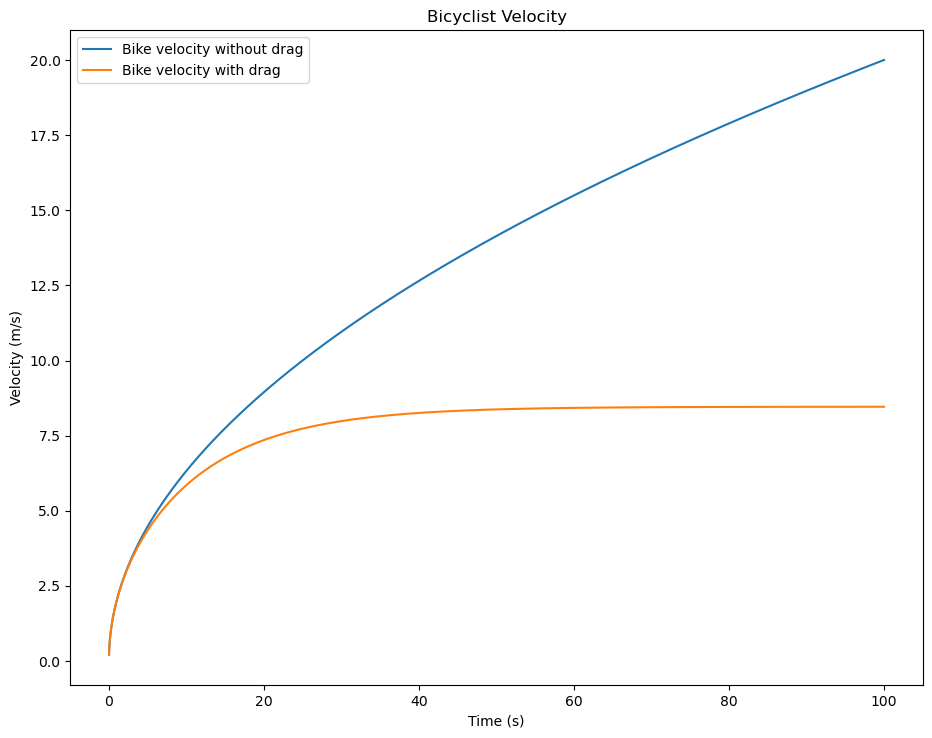

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#define constants
P = 200 #Watts
m = 100#kg
rho = 1.2 #kg per m^3
C_D= 1.1# unitless drag coefficient
A = 0.5 #m^2

#set simulation parameters
tau = 0.01 # timestep in seconds
v_0= 0.2 #initial velocity in m/s

#define acceleration differential equation
def accel(v,dragFlag):
    if dragFlag == 0:
        acc = P/(m*v)
    elif dragFlag ==1:
        acc = P/(m*v) - rho*C_D*A/(2*m)*v*v
    else:
        acc=0
    return acc

def simBike(dragFlag,maxSteps,tau,v_0):
    #set up plotting text
    plotLabel="Bike velocity "
    if dragFlag:
        plotLabel =plotLabel + "with drag"
    else:
        plotLabel = plotLabel + "without drag"
    #set up variables
    velArray= np.empty(maxSteps)
    accArray=np.empty(maxSteps)
    timeArray=np.empty(maxSteps)
    #set starting conditions
    velArray[0] = v_0
    #loop over time steps
    for iStep in range(maxSteps):
        accArray[iStep]=accel(velArray[iStep],dragFlag) # compute current step's acceleration
        if iStep + 1 < maxSteps:#if the next step is going to be recorded, compute it
            velArray[iStep+1] = velArray[iStep]+tau*accArray[iStep] # compute next step's velocity using current acceleration
        timeArray[iStep]=iStep*tau# maintain an array of the current time at each step

    plt.plot(timeArray,velArray,label=plotLabel)
    plt.xlabel("Time (s)")
    plt.ylabel("Velocity (m/s)")
    plt.title("Bicyclist Velocity")

simBike(dragFlag=0,maxSteps=10000,tau=tau,v_0=v_0)
simBike(dragFlag=1,maxSteps=10000,tau=tau,v_0=v_0)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(11,8.5)


The max velocity with air resistance is well within the capabilities of a moderately athletic biker. Without air resistance, the velocity increases with the square root of the time as expected from analytically solving the differential equation.

# Conclusion
I ran into a few problems initially with python array indexing since my experience is mostly in matlab, which has arrays that start at 1 and array indexing that works a little bit differently. Other than that, the coding was mostly smooth. The challenge was mostly around making sure the code I wrote properly implemented the euler method, and not a slightly bugged version of it. I might have accidentally implemented the euler-cromer method if I swapped the lines that update velocity and acceleration and written the code slightly differently. I'm also not sure if using an array to store and simulate the velocities and accelerations directly is good practice given the number of array accesses. I could have coded it to use a separate variable for current velocity and current acceleration, then record the values every loop like Garcia does for his balle simulation.It doesn't matter very much here, but it might slow down larger or more complicated simulations, so I'd be interested to know what the better practice is.
